<a href="https://colab.research.google.com/github/gauravry/DS_Portfolio/blob/main/MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
keras.datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [18]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
x_test.shape

(10000, 28, 28)

In [21]:
# Assuming x_train is your 3D array
x_train_flattened = x_train.reshape(-1, 28*28)

# Check the shape of the flattened array
print(x_train_flattened.shape)

# Assuming x_train is your 3D array
x_test_flattened = x_test.reshape(-1, 28*28)

# Check the shape of the flattened array
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


In [23]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [24]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

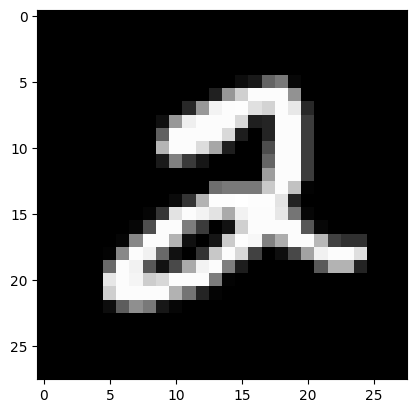

In [22]:
img = x_train_flattened[5].reshape((28,28))
plt.imshow(img,cmap='gray')

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size = 0.1, random_state=42)

### Model Building

In [25]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(784,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)])

In [26]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model training

In [27]:
model.fit(x_train_flattened, y_train, batch_size=64, epochs=5, validation_data=(x_test_flattened, y_test))

Epoch 1/5
938/938 [==============================] - 9s 8ms/step - loss: 1.2116 - accuracy: 0.8660 - val_loss: 0.3559 - val_accuracy: 0.9225
Epoch 2/5
938/938 [==============================] - 5s 6ms/step - loss: 0.2542 - accuracy: 0.9367 - val_loss: 0.2424 - val_accuracy: 0.9413
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.1696 - accuracy: 0.9529 - val_loss: 0.2292 - val_accuracy: 0.9420
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.1367 - accuracy: 0.9608 - val_loss: 0.1838 - val_accuracy: 0.9528
Epoch 5/5
938/938 [==============================] - 6s 7ms/step - loss: 0.1167 - accuracy: 0.9654 - val_loss: 0.1582 - val_accuracy: 0.9600


### Model evaluation

In [28]:
model.predict(x_test_flattened).argmax(axis=1)

313/313 [==============================] - 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6])

313/313 [==============================] - 2s 6ms/step
The predicted label is: 0


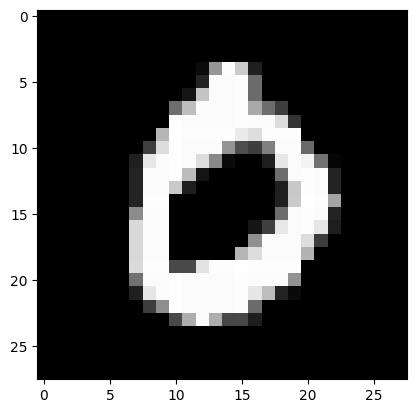

In [31]:
img = x_test_flattened[3].reshape((28,28))
plt.imshow(img,cmap='gray')
print("The predicted label is:" ,model.predict(x_test_flattened).argmax(axis=1)[3])

Further ahead: You can try increasing the model layers and play with the hyperparameters to increase model's performance